In [99]:
import numpy as np
import cv2
import os
import time
import Helpers
import Localization
import Segment
import plate_rotation

In [2]:
# Load Image
path = 'dataset/Frames/Category_I/'
name = 'plate4.jpg'
img = cv2.imread(path+name)

0.012322664260864258


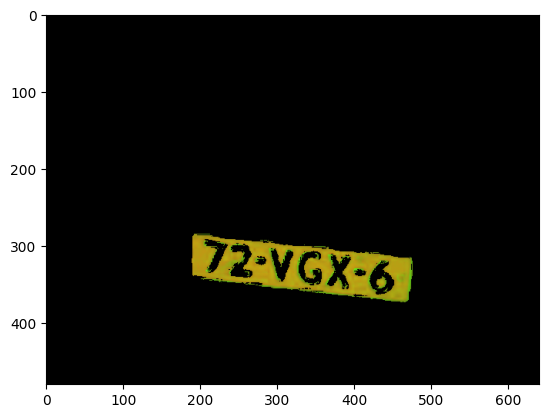

In [3]:
start = time.time()
masked1 = Localization.masked_image(img, 13, 28, 136,246,89, 240)
end = time.time()-start
print(end)
Helpers.plotImage(masked1)

0.009511232376098633


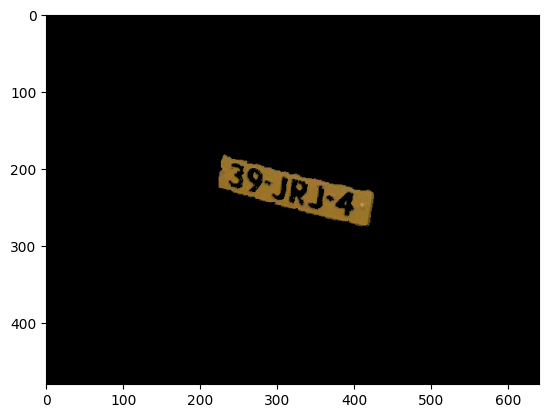

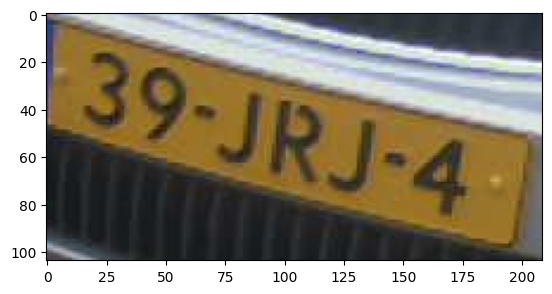

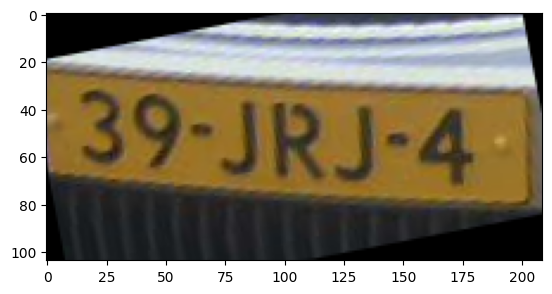

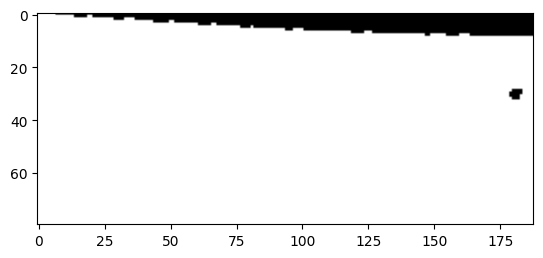

True


In [107]:
def crop_plates_better(masked, original):
    """
    This function, given a masked image, crops the parts of the image that contain license plates.
    It returns a list of the cropped images.
    """
    bgr = cv2.cvtColor(masked, cv2.COLOR_HSV2BGR)
    binary = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
    binary[binary > 50] = 255
    binary = Helpers.close(binary)
    #removed = Helpers.remove_black_rows(binary)
    #removed = Helpers.remove_black_columns(removed)
    plates = []
    columns = np.count_nonzero(binary, axis = 0)
    #columns[columns < 5] = 0
    start = 0
    while start < len(columns):
        if columns[start] == 0:
            start += 1
            if start >= len(columns)-1:
                break
            continue
        end = start+1
        while columns[end] > 0:
            end += 1
            if end == len(columns):
                break
        if end - start < 65:
            start = end+1
            continue
        rows = np.count_nonzero(binary[:, start:end], axis = 1)
        max_start = 0
        max_end = len(rows)-1
        max_count = 0
        cur_start = cur_end = 0
        while cur_start < len(rows)-1:
            if rows[cur_start] == 0:
                cur_start += 1
                if cur_start >= len(rows)-1:
                    break
                continue
            cur_end = cur_start+1
            while rows[cur_end] > 0:
                cur_end += 1
                if cur_end >= len(rows):
                    break
            cur_count = np.sum(rows[cur_start:cur_end])
            if cur_count > max_count:
                max_start = cur_start
                max_end = cur_end
                max_count = cur_count
            cur_start = cur_end+1
        plates.append(original[max_start:max_end, start:end])
        start = end+1
        if len(plates) == 2:
            break
    return plates

path = 'dataset/Frames/Category_I/'
name = 'plate24.jpg'
img = cv2.imread(path+name)
start = time.time()
masked = Localization.masked_image(img, 13, 28, 136,246,89, 240)
plates = crop_plates_better(masked, img)
end = time.time()-start
print(end)
Helpers.plotImage(cv2.cvtColor(masked, cv2.COLOR_HSV2BGR))
for plate in plates:
    Helpers.plotImage(plate)
    rotated = plate_rotation.rotation_pipeline(plate)
    Helpers.plotImage(rotated)
    chars, _ = Segment.segment(rotated, show=True)
    print(chars is None)